## Setups

In [153]:
import psycopg2
import pandas as pd
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
import string
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

wordnet_lemmatizer = WordNetLemmatizer()
dbname = 'bills_db'
username = 'Joel'

In [2]:
con = psycopg2.connect(database = dbname, user = username)

# query:
sql_query = """
SELECT * FROM us_bills;
"""
us_bills = pd.read_sql_query(sql_query,con)

us_bills.head()

,bill_num,bill_name,bill_text,top_subject
0,hconres1-114,Regarding consent to assemble outside the seat...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",Congress
1,hconres10-114,Recognizing the challenges and burdens associa...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",Education
2,hconres100-114,Expressing the sense of the Congress regarding...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",International affairs
3,hconres101-114,Supporting the Association of American Veterin...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",Education
4,hconres102-114,Providing for a joint session of Congress to r...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",Congress


## Slide 3

In [3]:
def lemmatize_tokens(tokens, lemma):
    lemmatized = []
    for item in tokens:
        lemmatized.append(lemma.lemmatize(item))
    return lemmatized

def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    text = "".join([ch for ch in text if ch not in string.digits])
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    tokens = word_tokenize(text)
    lemmas = lemmatize_tokens(tokens, wordnet_lemmatizer)
    return lemmas

def my_preproc_text(bill_tuple):
    text = bill_tuple[1].lower()
    revised = " ".join([t for t in text.split() if len(t) > 3])
    return revised

def my_preproc_title(bill_tuple):
    title = bill_tuple[0].lower()
    revised = " ".join([t for t in title.split() if len(t) > 3])
    return revised

In [4]:
us_tuples = [tuple(s) for s in us_bills[['bill_name', 'bill_text']].values]

In [5]:
us_vect = CountVectorizer(stop_words='english', tokenizer=tokenize, preprocessor=my_preproc_text)


In [74]:
us_tf_text = vect.fit_transform(us_tuples)

In [75]:
us_tf_text[0]

<1x73534 sparse matrix of type '<type 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [76]:
len(vect.get_feature_names())

73534

In [77]:
import scipy

In [78]:
column_sums = us_tf_text.sum(axis=0)

In [79]:
sum_df = pd.DataFrame(column_sums.transpose(), index=vect.get_feature_names(), columns=['word_counts'])

In [80]:
#sum_df

In [81]:
us_top_30 = sum_df.sort_values(by='word_counts', ascending=False)[0:30]

In [82]:
us_top_30

,word_counts
section,187868
shall,187496
state,170831
secretary,101867
united,93867
subsection,92047
sec,84034
year,78258
program,77342
paragraph,75190


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
# here we set some aesthetic parameters so that all of our figures are nice and big
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
sns.set(style="white", context="talk")

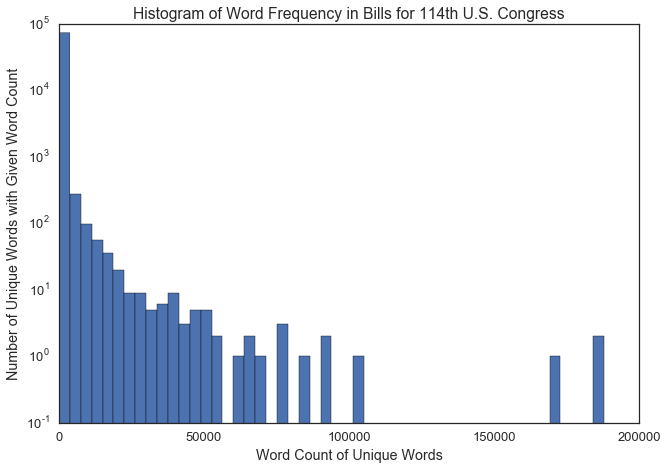

In [63]:
plt.hist(sum_df['word_counts'], 50, log=True)
plt.ylabel("Number of Unique Words with Given Word Count")
plt.xlabel("Word Count of Unique Words")
plt.ylim(0.1)
plt.title("Histogram of Word Frequency in Bills for 114th U.S. Congress")

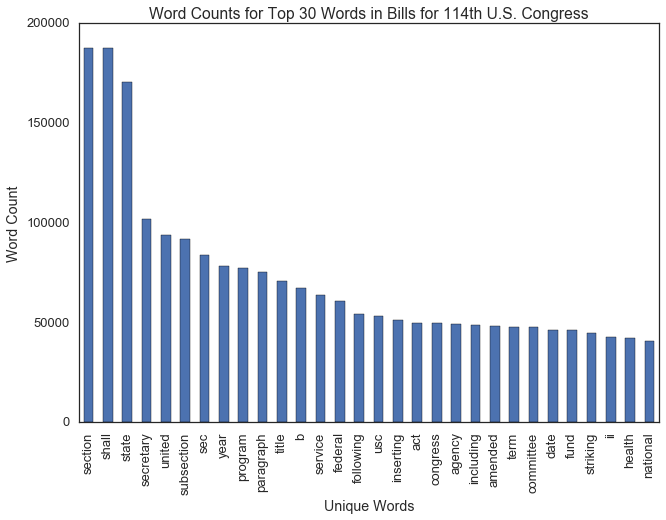

In [62]:
us_top_30.plot(kind='bar', legend=None)
plt.ylabel("Word Count")
plt.xlabel("Unique Words")
plt.title("Word Counts for Top 30 Words in Bills for 114th U.S. Congress")

In [21]:
import tqdm

In [103]:
all_words = [word for word in tqdm.tqdm(vect.get_feature_names()) for i in range(0,sum_df.ix[word,0])]

100%|██████████| 73534/73534 [00:27<00:00, 2659.98it/s]


In [111]:
one_text = " ".join(all_words)

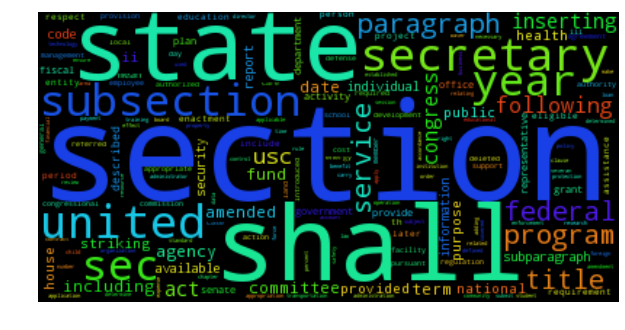

In [112]:
wordcloud = WordCloud().generate(one_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [114]:
ny_vect = CountVectorizer(stop_words='english', tokenizer=tokenize, preprocessor=my_preproc_text)

In [115]:
# query:
sql_query = """
SELECT * FROM ny_bills;
"""
ny_bills = pd.read_sql_query(sql_query,con)

ny_bills.head()

,bill_num,bill_name,bill_text
0,J6483,Congratulating Benjamin Petrella upon the occa...,\nLEGISLATIVE RESOLUTION congratulating Benj...
1,J6488,Honoring Chandler M. Ralph upon the occasion o...,\nLEGISLATIVE RESOLUTION honoring Chandler M...
2,J6490,Commending the Rotary Club of Plattsburgh upon...,\nLEGISLATIVE RESOLUTION commending the Rot...
3,J6495,Congratulating Andrew Henry upon the occasion ...,\nLEGISLATIVE RESOLUTION congratulating Andre...
4,J6229,"Honoring John C. Googas, Jr. for his distingui...",\nLEGISLATIVE RESOLUTION honoring John C. G...


In [117]:
ny_tuples = [tuple(s) for s in ny_bills[['bill_name', 'bill_text']].values]

In [118]:
ny_tf_text = ny_vect.fit_transform(ny_tuples)

In [119]:
ny_column_sums = ny_tf_text.sum(axis=0)

In [120]:
ny_sum_df = pd.DataFrame(ny_column_sums.transpose(), index=ny_vect.get_feature_names(), columns=['word_counts'])

In [121]:
ny_top_30 = ny_sum_df.sort_values(by='word_counts', ascending=False)[0:30]

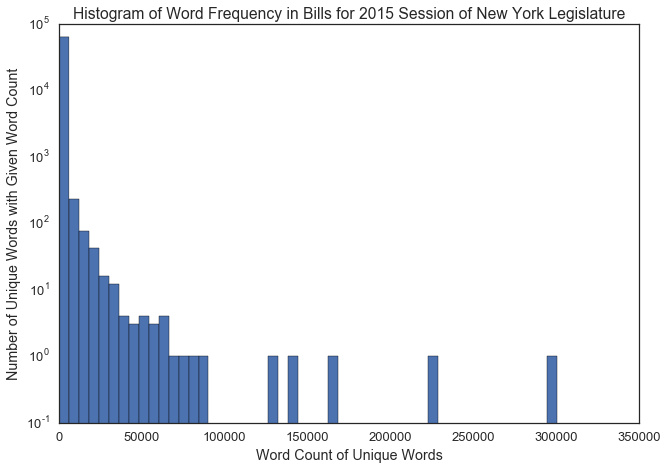

In [122]:
plt.hist(ny_sum_df['word_counts'], 50, log=True)
plt.ylabel("Number of Unique Words with Given Word Count")
plt.xlabel("Word Count of Unique Words")
plt.ylim(0.1)
plt.title("Histogram of Word Frequency in Bills for 2015 Session of New York Legislature")

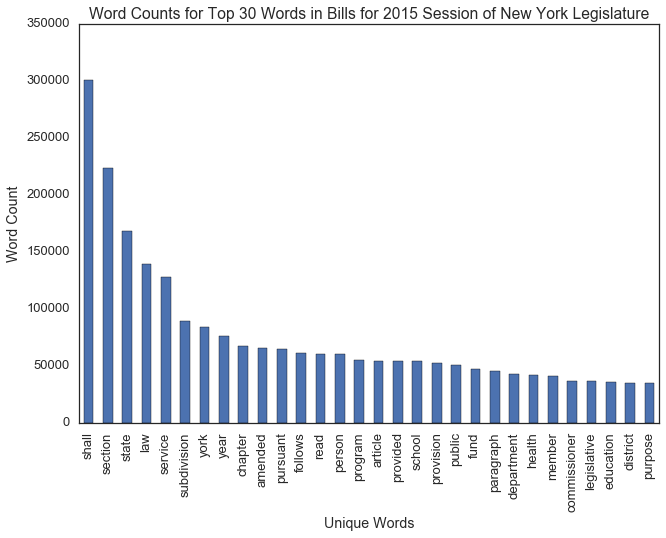

In [123]:
ny_top_30.plot(kind='bar', legend=None)
plt.ylabel("Word Count")
plt.xlabel("Unique Words")
plt.title("Word Counts for Top 30 Words in Bills for 2015 Session of New York Legislature")

In [124]:
ny_all_words = [word for word in tqdm.tqdm(ny_vect.get_feature_names()) for i in range(0,ny_sum_df.ix[word,0])]

100%|██████████| 63721/63721 [00:37<00:00, 1709.43it/s]


In [125]:
ny_one_text = " ".join(ny_all_words)

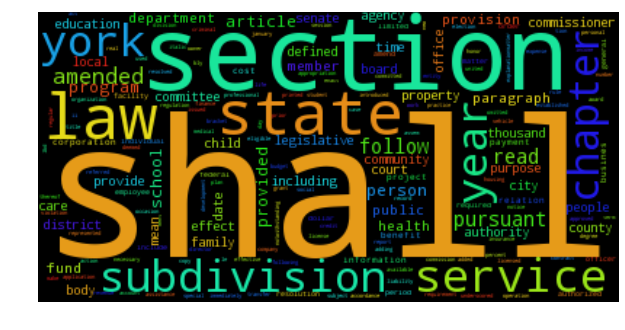

In [126]:
wordcloud = WordCloud().generate(ny_one_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Cleaned by focusing only on words in at least 10 documents and fewer than 40% of documents

In [130]:
us_clean_vect = CountVectorizer(stop_words='english', tokenizer=tokenize, preprocessor=my_preproc_text,  min_df=10, max_df=0.4)

In [131]:
us_clean_tf_text = us_clean_vect.fit_transform(us_tuples)

In [132]:
us_clean_column_sums = us_clean_tf_text.sum(axis=0)

In [133]:
us_clean_sum_df = pd.DataFrame(us_clean_column_sums.transpose(), index=us_clean_vect.get_feature_names(), columns=['word_counts'])

In [134]:
us_clean_top_30 = us_clean_sum_df.sort_values(by='word_counts', ascending=False)[0:30]

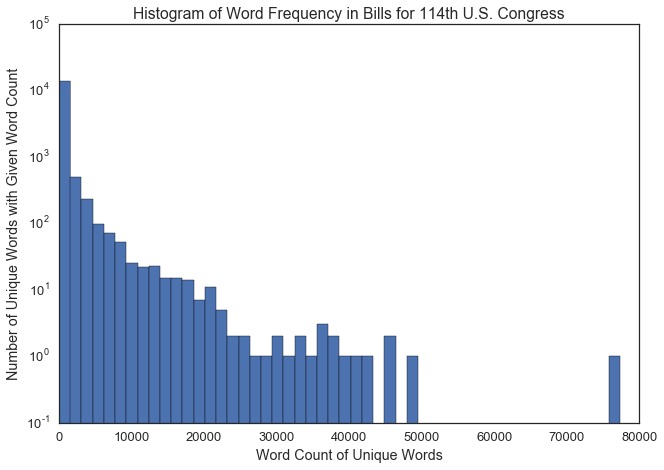

In [135]:
plt.hist(us_clean_sum_df['word_counts'], 50, log=True)
plt.ylabel("Number of Unique Words with Given Word Count")
plt.xlabel("Word Count of Unique Words")
plt.ylim(0.1)
plt.title("Histogram of Word Frequency in Bills for 114th U.S. Congress")

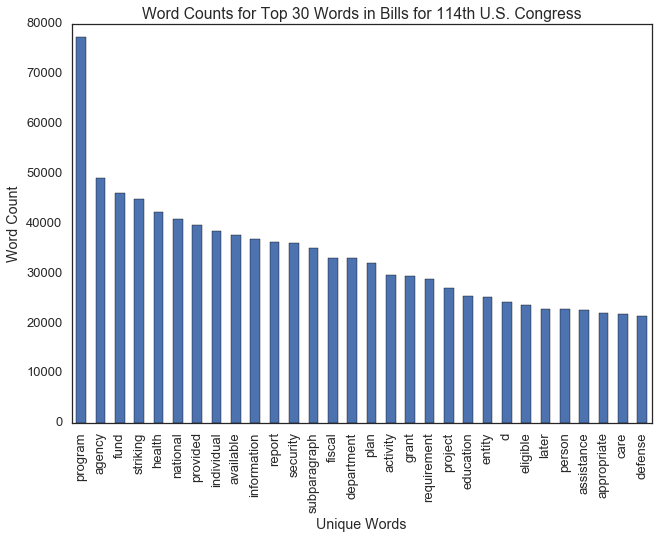

In [136]:
us_clean_top_30.plot(kind='bar', legend=None)
plt.ylabel("Word Count")
plt.xlabel("Unique Words")
plt.title("Word Counts for Top 30 Words in Bills for 114th U.S. Congress")

In [137]:
us_clean_all_words = [word for word in tqdm.tqdm(us_clean_vect.get_feature_names()) for i in range(0,us_clean_sum_df.ix[word,0])]

100%|██████████| 14854/14854 [00:07<00:00, 1933.36it/s]


In [138]:
us_clean_one_text = " ".join(us_clean_all_words)

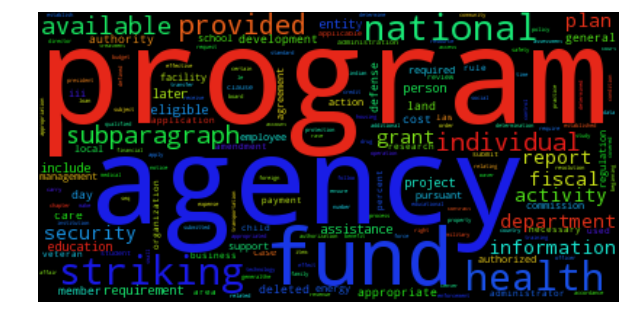

In [139]:
wordcloud = WordCloud().generate(us_clean_one_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### NY Clean Data

In [141]:
ny_clean_vect = CountVectorizer(stop_words='english', tokenizer=tokenize, preprocessor=my_preproc_text,  min_df=10, max_df=0.4)

In [142]:
ny_clean_tf_text = ny_clean_vect.fit_transform(ny_tuples)

In [143]:
ny_clean_column_sums = ny_clean_tf_text.sum(axis=0)

In [144]:
ny_clean_sum_df = pd.DataFrame(ny_clean_column_sums.transpose(), index=ny_clean_vect.get_feature_names(), columns=['word_counts'])

In [145]:
ny_clean_top_30 = ny_clean_sum_df.sort_values(by='word_counts', ascending=False)[0:30]

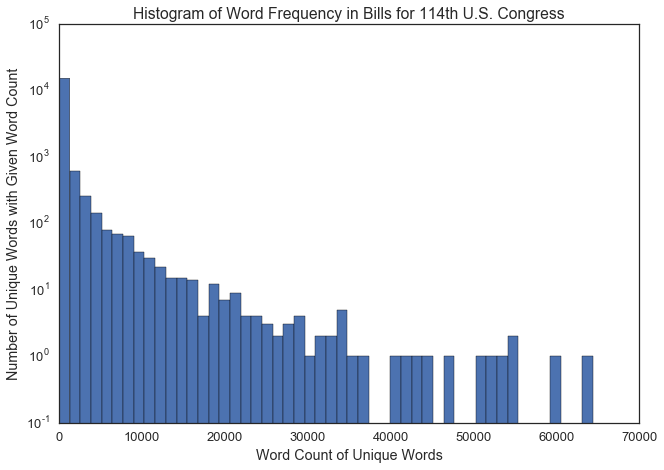

In [146]:
plt.hist(ny_clean_sum_df['word_counts'], 50, log=True)
plt.ylabel("Number of Unique Words with Given Word Count")
plt.xlabel("Word Count of Unique Words")
plt.ylim(0.1)
plt.title("Histogram of Word Frequency in Bills for 114th U.S. Congress")

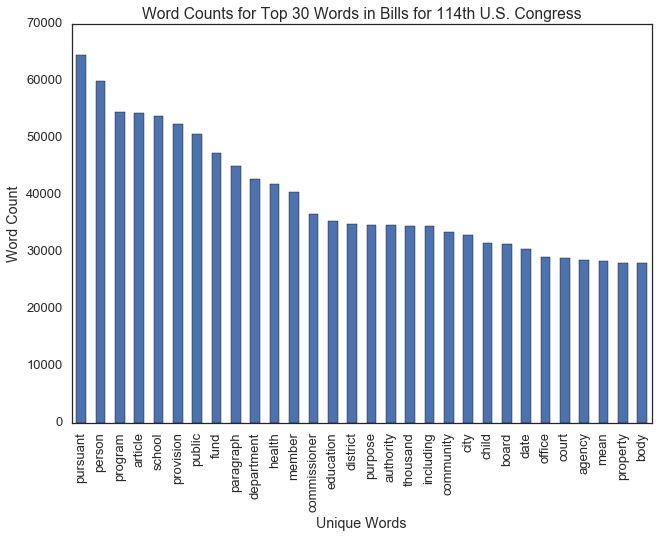

In [147]:
ny_clean_top_30.plot(kind='bar', legend=None)
plt.ylabel("Word Count")
plt.xlabel("Unique Words")
plt.title("Word Counts for Top 30 Words in Bills for 114th U.S. Congress")

In [148]:
ny_clean_all_words = [word for word in tqdm.tqdm(ny_clean_vect.get_feature_names()) for i in range(0,ny_clean_sum_df.ix[word,0])]

100%|██████████| 16562/16562 [00:08<00:00, 1859.61it/s]


In [149]:
ny_clean_one_text = " ".join(ny_clean_all_words)

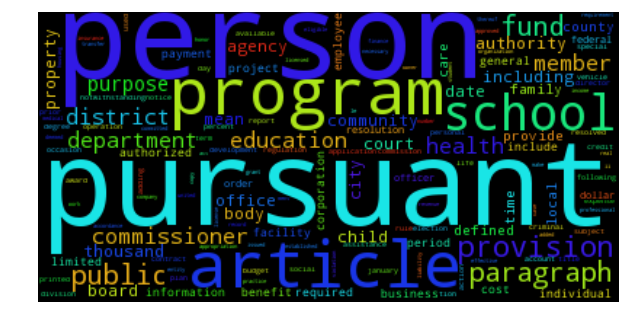

In [150]:
wordcloud = WordCloud().generate(ny_clean_one_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Differential Data

We would need to get count vectors for each of the words

In [151]:
## TF IDF Visuals--only clean data

In [154]:
tfidf_us_vect = TfidfVectorizer(stop_words='english', tokenizer=tokenize, preprocessor=my_preproc_text,  min_df=10, max_df=0.4)

In [155]:
tfidf_us_text = tfidf_us_vect.fit_transform(us_tuples)

In [156]:
tfidf_us_column_sums = tfidf_us_text.sum(axis=0)

In [157]:
tfidf_us_sum_df = pd.DataFrame(tfidf_us_column_sums.transpose(), index=tfidf_us_vect.get_feature_names(), columns=['word_counts'])

In [158]:
tfidf_us_top_30 = tfidf_us_sum_df.sort_values(by='word_counts', ascending=False)[0:30]

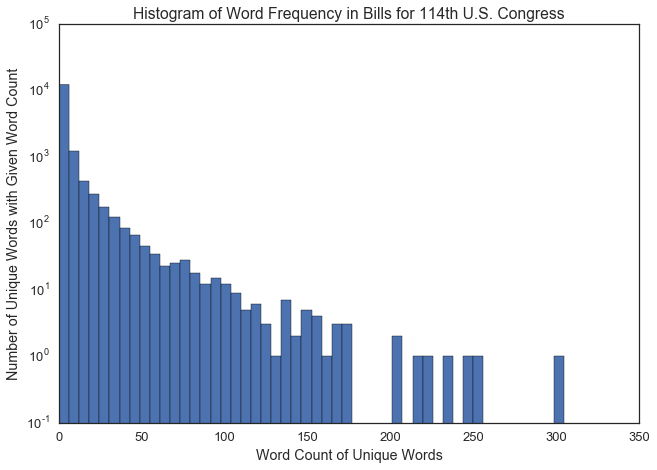

In [159]:
plt.hist(tfidf_us_sum_df['word_counts'], 50, log=True)
plt.ylabel("Count of Words with Given Density")
plt.xlabel("Densities of Unique Words")
plt.ylim(0.1)
plt.title("Histogram of Word Densities in Bills for 114th U.S. Congress")

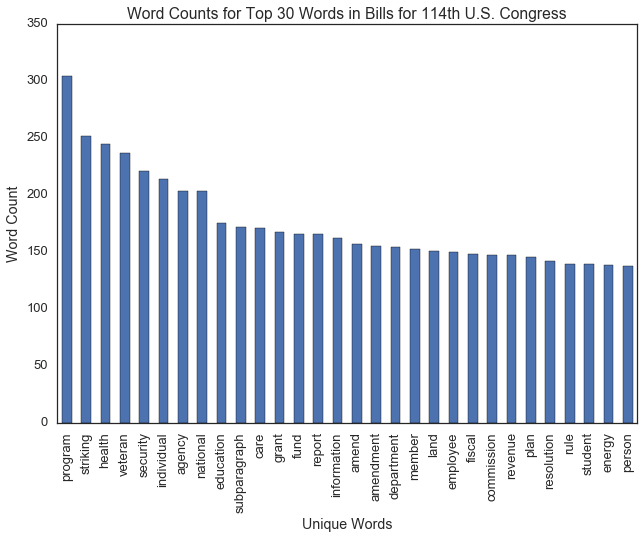

In [160]:
tfidf_us_top_30.plot(kind='bar', legend=None)
plt.ylabel("Count of Words with Given Density")
plt.xlabel("Densities of Unique Words")
plt.title("Histogram of Word Densities in Bills for 114th U.S. Congress")

In [161]:
tfidf_ny_vect = TfidfVectorizer(stop_words='english', tokenizer=tokenize, preprocessor=my_preproc_text,  min_df=10, max_df=0.4)

In [162]:
tfidf_ny_text = tfidf_ny_vect.fit_transform(ny_tuples)

In [163]:
tfidf_ny_column_sums = tfidf_ny_text.sum(axis=0)

In [164]:
tfidf_ny_sum_df = pd.DataFrame(tfidf_ny_column_sums.transpose(), index=tfidf_ny_vect.get_feature_names(), columns=['word_counts'])

In [165]:
tfidf_ny_top_30 = tfidf_ny_sum_df.sort_values(by='word_counts', ascending=False)[0:30]

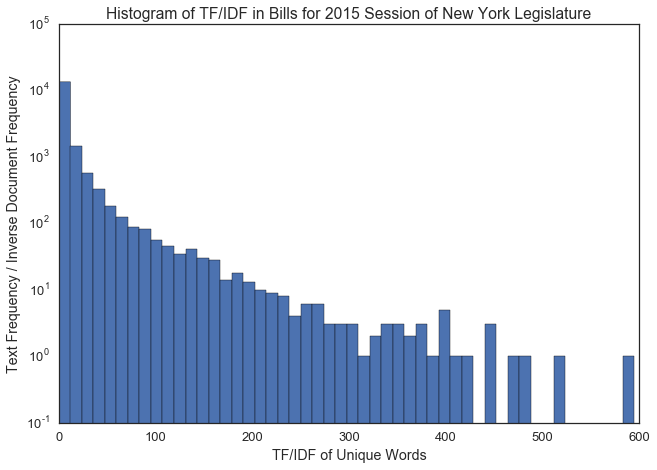

In [166]:
plt.hist(tfidf_ny_sum_df['word_counts'], 50, log=True)
plt.ylabel("Count of Words with Given Density")
plt.xlabel("Densities of Unique Words")
plt.ylim(0.1)
plt.title("Histogram of Word Densities in Bills for 2015 Session of New York Legislature")

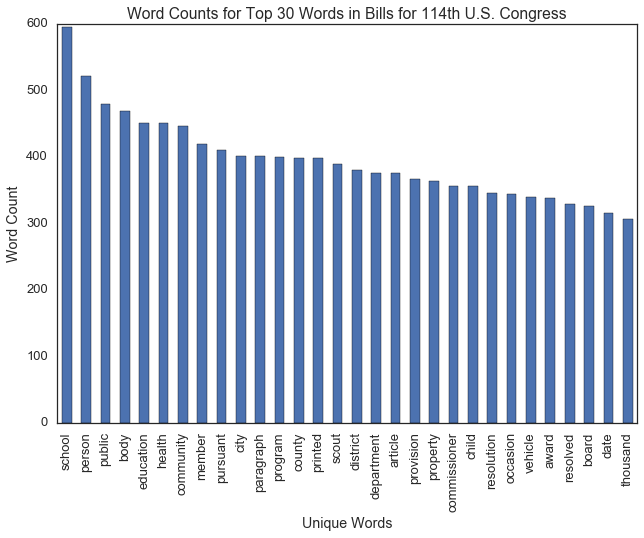

In [168]:
tfidf_ny_top_30.plot(kind='bar', legend=None)
plt.ylabel("Word Density")
plt.xlabel("Unique Words")
plt.title("Top Word Densities in Bills for 2015 New York Legislative Session")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
data = np.random.random((N, 4))
labels = ['point{0}'.format(i) for i in range(N)]
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 1], marker = 'o', c = data[:, 2], s = data[:, 3]*1500,
    cmap = plt.get_cmap('Spectral'))
for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

In [218]:
tfidf_ny_top_10 = tfidf_ny_sum_df.sort_values(by='word_counts', ascending=False)[0:10]

In [219]:
ny_tfs = ny_clean_sum_df[ny_clean_sum_df.index.isin(tfidf_ny_top_10.index)]

In [220]:
ny_idfs = tfidf_ny_top_10/ny_tfs

In [221]:
ny_idfs

,word_counts
body,0.016767
city,0.012197
community,0.013348
education,0.012720
health,0.010768
member,0.010339
person,0.008698
public,0.009460
pursuant,0.006353
school,0.011050


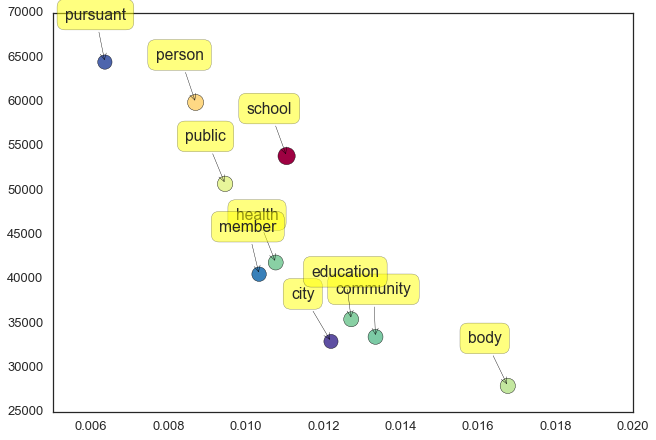

In [224]:
labels = ny_tfs.sort_index().index
#plt.subplots_adjust(bottom = 0.1)
y = ny_tfs.sort_index()['word_counts']
x = ny_idfs.sort_index()['word_counts']
plt.scatter(
    x, y, marker = 'o', s = tfidf_ny_top_10.sort_index()['word_counts']*0.5,
    c = tfidf_ny_top_10.sort_index()['word_counts'], cmap = plt.get_cmap('Spectral_r'))
for label, x, y in zip(labels, x, y):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-40, 40),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.xlim(0.005,0.02)
plt.show()